In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cats-dogs/cats/cats/cat.4261.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4329.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4168.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4624.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4745.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4803.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4910.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4390.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4014.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4786.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4342.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4827.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4089.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4190.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4790.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4913.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4682.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4997.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4560.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4754.jpg
/kaggle/input/cats-dogs/cats/cats/cat.4556.jpg
/kaggle/input

In [2]:
import matplotlib.pyplot as plt
import cv2
import copy

In [3]:
cat_path = "../input/cats-dogs/cats/cats/"
dog_path = "../input/cats-dogs/dogs/dogs/"
dataframe = np.array([np.nan]*40000)
dataframe_labels = np.array([np.nan])
dataframe = dataframe.reshape(1,40000)

In [4]:
# Resizing all the images into 200*200
dim = (200, 200)
count = 0
for files in os.listdir("../input/cats-dogs/cats/cats"):
    if(count < 2000 and files.split(".")[0]=='cat'):
        im = cv2.imread(cat_path+files, 0)
        im = cv2.resize(im, dim)
        im = im.reshape(1,im.shape[0]*im.shape[1])
        dataframe = np.vstack((dataframe, im))
        label = np.array([1])
        dataframe_labels = np.vstack((dataframe_labels, label))
        count = count + 1
    else:
        break

In [5]:
# Resizing all the images into 200*200
dim = (200, 200)
count = 0
for files in os.listdir("../input/cats-dogs/dogs/dogs"):
    if(count < 2000 and files.split(".")[0]=='dog'):
        im = cv2.imread(dog_path+files, 0)
        im = cv2.resize(im, dim)
        im = im.reshape(1,im.shape[0]*im.shape[1])
        dataframe = np.vstack((dataframe, im))
        label = np.array([0])
        dataframe_labels = np.vstack((dataframe_labels, label))
        count = count + 1
    else:
        break

In [6]:
# removing the Nan values from dataframe 
dataframe = copy.copy(dataframe[1:,:])
dataframe_labels = copy.copy(dataframe_labels[1:,:])

In [7]:
# Splitting the dataframe into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataframe, dataframe_labels, test_size=0.66, random_state=42)

In [8]:
# Normalising the values between 0 and 255
X_train = X_train / 255
X_test = X_test / 255

In [9]:
#reshape data to fit model
X_train = X_train.reshape(-1,200,200,1)
X_test = X_test.reshape(-1,200,200,1)

In [10]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [11]:
#one-hot encoding the labels
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [12]:
# Building CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [13]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(200,200,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(units=2,activation='softmax'))

In [14]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
#train the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=25)

Epoch 1/25
19/19 [==============================] - 2s 111ms/step - loss: 2.9584 - accuracy: 0.5052 - val_loss: 0.6925 - val_accuracy: 0.5142
Epoch 2/25
19/19 [==============================] - 2s 93ms/step - loss: 0.6626 - accuracy: 0.6483 - val_loss: 0.6796 - val_accuracy: 0.5746
Epoch 3/25
19/19 [==============================] - 2s 92ms/step - loss: 0.5305 - accuracy: 0.7793 - val_loss: 0.6944 - val_accuracy: 0.5533
Epoch 4/25
19/19 [==============================] - 2s 95ms/step - loss: 0.3564 - accuracy: 0.8931 - val_loss: 0.7664 - val_accuracy: 0.5480
Epoch 5/25
19/19 [==============================] - 2s 94ms/step - loss: 0.1670 - accuracy: 0.9672 - val_loss: 0.9139 - val_accuracy: 0.5506
Epoch 6/25
19/19 [==============================] - 2s 93ms/step - loss: 0.0689 - accuracy: 0.9931 - val_loss: 1.0995 - val_accuracy: 0.5551
Epoch 7/25
19/19 [==============================] - 2s 93ms/step - loss: 0.0297 - accuracy: 0.9966 - val_loss: 1.3097 - val_accuracy: 0.5426
Epoch 8/25
1

In [16]:
model.predict(X_test[:5])

array([[9.9999166e-01, 8.2940915e-06],
       [2.9606887e-04, 9.9970394e-01],
       [3.1823721e-02, 9.6817625e-01],
       [5.8417696e-01, 4.1582304e-01],
       [9.9166459e-01, 8.3353361e-03]], dtype=float32)

In [17]:
Y_test[:5] # PART 1 ENDS HERE

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [18]:
model.save("cats_dogs.py")

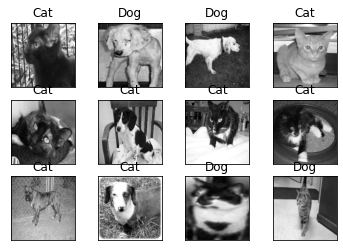

In [19]:
fig=plt.figure()
IMG_SIZE = 200
for num,data in enumerate(X_test[:12]):
    y = fig.add_subplot(3,4,num+1)
    data = data.reshape(1,IMG_SIZE,IMG_SIZE,1)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: 
        str_label='Dog'
    else: 
        str_label='Cat'
    data = data.reshape(200,200)
    y.imshow(data,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [20]:
data = X_test[0].reshape(1,200,200,1)

In [21]:
prediction = model.predict([data])[0]

In [22]:
from scipy.signal import convolve2d

In [23]:
image = cv2.imread("../input/cats-dogs/dogs/dogs/dog.4001.jpg")
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [24]:
image.shape

(499, 421, 3)

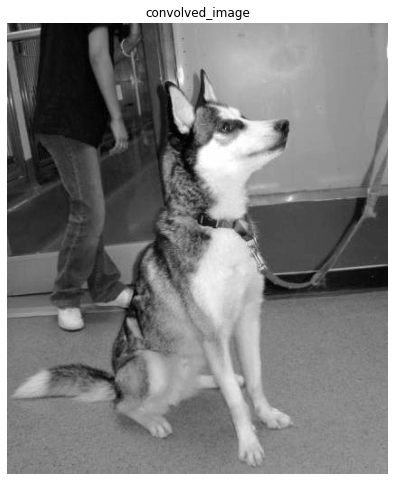

In [25]:
kernel = np.ones((28,28), np.float32)/784
convolved = convolve2d(image1, kernel)
fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.title('convolved_image')
plt.axis('off')
plt.imshow(image1, cmap='gray')

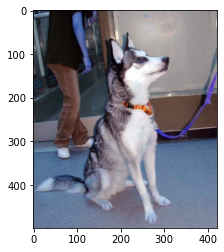

In [26]:
plt.imshow(image, cmap='gray')

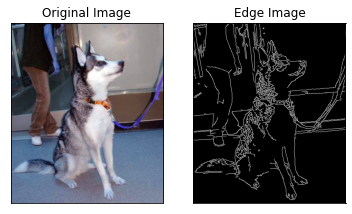

In [27]:
edges = cv2.Canny(image,100,200)
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()